## <span>DIMENSIONALITY REDUCTION METHODS</span>

A1. Since PCA is only used to find the principal components that account for the most variance of a dataset, it is essential to know which principal components are crucial for understanding customer churn. Which customer traits could therefore be utilized to identify potential churners in the future?

A2. Knowing which customers are most likely to leave can assist business stakeholders in deciding how to provide increased services to those clients who meet these requirements and have a history of unhappiness. PCA is primarily used to pinpoint the primary components of a dataset that contribute the most variance. The PCA approach mainly compresses a dataset into a lower-dimensional feature subspace to preserve most essential data, lessen the model's complexity, and decrease a large dataset for more in-depth study.

B1.
Principal Component Investigation (PCA) is utilized in this analysis to extract features. PCA is broken down using linear algebra procedures to transform the dataset into a more manageable format with significantly fewer and more important variables. Following are the steps for PCA:
Norm the information. This entails applying the mathematical formula of dividing by the standard deviation after dividing the data points by their mean.
The Eigenvectors and Eigenvalues can be found using the covariance matrix.
After ranking Eigenvalues in decreasing order, choose the k Eigenvectors, where k is the new feature subspace's number of dimensions corresponding to the k largest Eigenvalues. Projection matrix W was created from the selected k Eigenvectors, then transformed into the original dataset.

B2. PCA Assumption: 

PCA assumes that the data set must be linear, all variables must have linear relationships, and several variables must be assessed at the continuous level.

C1. Variables in a Continuous Dataset:

We might find the relevance of the continuous variables when we clean the data: Variables such as Age, Income, Outage_sec_perweek, Tenure, MonthlyCharge, and Bandwidth_GB_Year can all be seen in the telecompany dataset.
Pandas, NumPy, scikit-learn, seaborn, and matplotlib library packages were all pre-installed via miniconda.

In [2]:
from sklearn.preprocessing import StandardScaler 
newchurns = pd.read_csv('churn_clean.csv')

In [3]:
newchurns.shape

(10000, 50)

In [ ]:
newchurns.columns

In [8]:
newchurns = newchurns.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Marital', 'Gender', 'Churn', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [9]:
newchurns.shape
#The new dataset has been adjusted only to have 6 columns, down from 50.

(10000, 6)

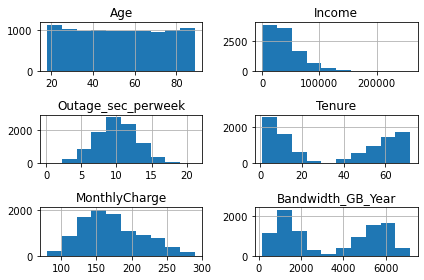

In [12]:
newchurns.hist()
plt.tight_layout()

In [13]:
 # Variable 'features' stands for the list of features that will be used for further analysis. 
features = (list(newchurns.columns[:-1]))


In [14]:
newchurns.to_csv('newchurn.csv')
newchurns = pd.read_csv('newchurn.csv')

In [15]:
newchurns= newchurns.drop(columns=['Unnamed: 0'])

C2. Standardization of Continous Dataset Variables: 

In [16]:
X = newchurns[['Bandwidth_GB_Year', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Tenure']]

In [17]:
from sklearn.preprocessing import (StandardScaler, LabelEncoder)
scaler = StandardScaler() #Creating the Object

In [18]:
#Calculate the mean and standard deviation 
scaler.fit(X)
X_scaler = scaler.transform(X)

D1. Matrix of all  Principal Components

In [23]:
vector1 = np.mean(X_scaler, axis=0)
#The covariance matrix is constructed after normalizing the range of variables to find correlations.
covariance_matrix = (X_scaler - vector1).T.dot((X_scaler- vector1)) / (X_scaler.shape[0] - 1)

In [25]:
covariance_matrix

array([[ 1.00010001, -0.01472512,  0.00367392,  0.00417608,  0.06041247,
         0.99159435],
       [-0.01472512,  1.00010001, -0.00409101, -0.00804752,  0.01072958,
         0.01698097],
       [ 0.00367392, -0.00409101,  1.00010001, -0.01001155, -0.00301427,
         0.00211458],
       [ 0.00417608, -0.00804752, -0.01001155,  1.00010001,  0.02049812,
         0.00293225],
       [ 0.06041247,  0.01072958, -0.00301427,  0.02049812,  1.00010001,
        -0.00333714],
       [ 0.99159435,  0.01698097,  0.00211458,  0.00293225, -0.00333714,
         1.00010001]])

D2: Applying PCA to all relevant features to explain 100% variance. 

In [26]:
import sklearn 
from sklearn.decomposition import PCA 
pca_10 = PCA(n_components = 6, random_state = 2020)
pca_10.fit(X_scaler)
pc = pca_10.transform(X_scaler)

In [39]:
#Create a dataframe to explain all the features of the dataset
pca_dframe = pd.DataFrame(pc, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_dframe

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.549624,0.183757,0.950359,-0.365419,-0.251148,-0.047707
1,-1.664572,-1.588061,-0.965289,0.203493,-1.308943,-0.050242
2,-0.949043,-0.386374,-0.197328,-1.050343,0.005160,0.079540
3,-0.906591,-0.569056,-1.027522,-1.066330,1.494940,0.119667
4,-1.909291,0.553598,1.447955,-0.210376,0.492330,-0.075630
...,...,...,...,...,...,...
9995,1.894354,0.732229,-1.350701,0.304329,-0.406035,0.089706
9996,1.478673,0.187793,0.362010,0.063596,-1.311724,-0.004997
9997,0.583476,0.919956,0.182857,0.069542,-0.742790,-0.099220
9998,2.047124,-1.838827,-0.457749,0.080073,-1.091191,-0.080222


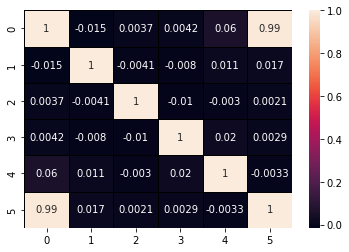

In [31]:
sns.heatmap(covariance_matrix, annot=True, linecolor='black', linewidths=0.5)
plt.show()

In [32]:
covariance_matrix = np.cov(X_scaler.T)
evals, evecs = np.linalg.eig(covariance_matrix)

In [34]:
print("Each of the 6 major components explains variation = ", sum(pca_10.explained_variance_ratio_ * 100))

Each of the 6 major components explains variation =  100.0


In [36]:
varex1 = pca_10.explained_variance_ratio_*100
var_df123 = pd.DataFrame(varex1.round(2), columns = ['Captured Variance for PC'], index = ['PC1','PC2','PC3','PC4','PC5','PC6'])
var_df123

,Captured Variance for PC
PC1,33.22
PC2,17.07
PC3,16.77
PC4,16.63
PC5,16.21
PC6,0.10


Scree Plot

* According to the Kaiser criterion rule, the scree plot below shows that PC1 through PC5 account for about 95% of the meaningful variance, making PC6 irrelevant to the analysis. When using the Kaiser Criterion, components that have variances higher than the mean of the eigenvalues are kept. We only keep the first five components in light of the kaiser criterion because their variance is more significant than one.

Text(0, 0.5, 'Explained Variance')

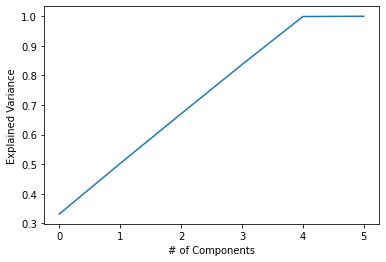

In [46]:
plt.plot(np.cumsum(pca_10.explained_variance_ratio_))
plt.xlabel("# of Components")
plt.ylabel("Explained Variance")

D3. Total Variance of Components

In [40]:
evals = pca_10.explained_variance_
eigen_df = pd.DataFrame(evals.round(4), columns = ['Eigenvalues Per PC'], index = ['PC1','PC2','PC3','PC4','PC5','PC6'])
eigen_df

,Eigenvalues Per PC
PC1,1.9934
PC2,1.0244
PC3,1.0065
PC4,0.9977
PC5,0.9726
PC6,0.0059


In [41]:
np.sum(eigen_df.values) #std dev.

6.0005

D4. Total Variance Captured by Components

The cumulative sum of the array can be explained by the below percentages captured

In [42]:
np.cumsum(pca_10.explained_variance_ratio_ * 100)

array([ 33.21983908,  50.29228314,  67.06567155,  83.69229581,
        99.90116178, 100.        ])

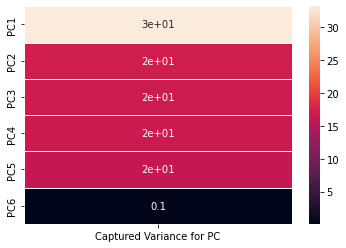

In [43]:
sns.heatmap(var_df123, annot = True, linewidth = 0.5, fmt='.1g')
plt.show()

In [44]:
pca_02 = PCA(n_components = 2, random_state = 2022)
pca_02.fit(X_scaler)
d_X_pca_2 = pca_02.transform(X_scaler)

Text(0, 0.5, '2nd principal component')

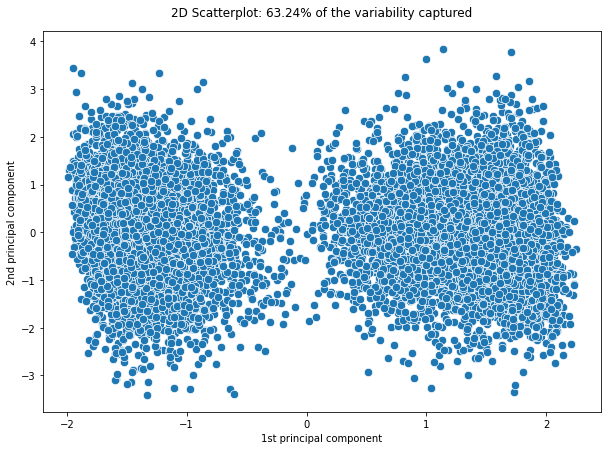

In [45]:
plt.figure(figsize =(10,7))
sns.scatterplot(x = d_X_pca_2[:,0], y = d_X_pca_2[:,1], s = 70, palette = ['green', 'blue'])
plt.title('2D Scatterplot: 63.24% of the variability captured', pad = 15)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

D5. 
We employed PCA analysis to condense our information into a much more manageable size with better emphasis on the significant numerical factors crucial to customer churn. We might be able to avoid overfitting since we now know fewer variables and have a better grasp of how they interact than we had before the analysis.
The actions mentioned above are made up of a few selected continuous variables. The variables were standardized, and covariance matrices were created. Using the scree plot, a list of components is found, and the variance is in list order. 
Decision-makers and marketers need to be know that a total variance of 10.0 was produced by the predictor variables . Four of the components we have had values larger than 1. We might advance to more advanced data mining tools that can extract profound significance from these found components.
Finally, we should examine these specific characteristics that prior employees who left the organization shared and work to lessen their likelihood of happening with any given customer.